# Linear Algebra (CpE210A)

### Laboratory 2: Plotting Vectors using NumPy and MatPlotLib

Coded and submitted by:<br>
ESCOBAR, Angela Shanine G.<br>
58010

##### Lab Exercises:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

# Part 1: Skyline Eagle Fly
You are tasked to make a tracking device for Philippine Eagles at the Philippine Eagle Center at Davao. The tracker sensors only give the longitudinal and latitudinal distance (meters) of the eagle's position relative to their nests which we will treat as the origin of the tracking view. We want to determine the relative displacement of the eagle from its nest. It is expected that the eagles will change exactly two times, it can then be assumed that the program will show three displacements. Please make a prototype code using the additional information given below:

Consider the computational algorithm:

Let the eagle's longitudinal and latitudinal be  long  and  lat  respectively.<br>
Let the eagle's total distance as  disttotal , displacement be  disp , and  θ  as the direction of the vector.

 $ (Eq.1)dist_(total) = (long_{total})\hat{x} +(long_{total})\hat{y}$
 <br> $ (Eq.2) disp = \sqrt{dist^{2} + disty^{2}}$ 
 <br>$ (Eq.3)^{θ} = arctan\frac{y}{ax} $

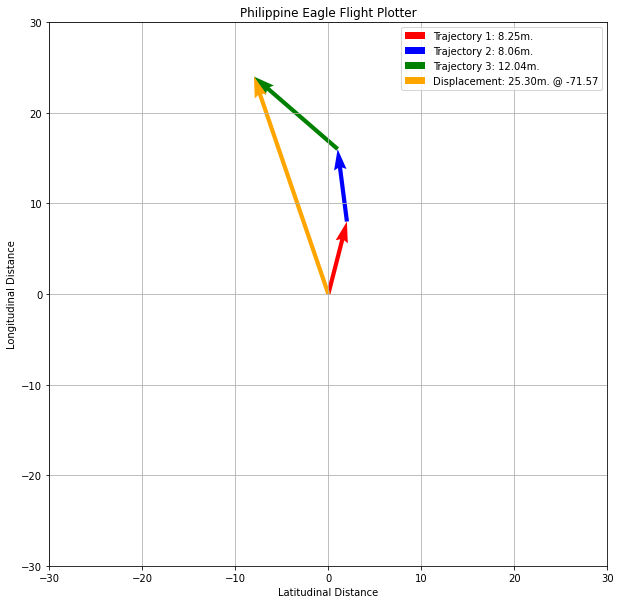

In [21]:
## START OF FUNCTION
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3) ## since we don't actually have eagle tracking data we will use
    lat = np.random.randint(-10,10, size=3)  ## random integers for this activity. These two lines will produce
                                             ## a vector with shape of (3,) describing the distances for the 
                                             ## eagle's flight.

    dist1 = np.array([long[0],lat[0]])       ## setup the array for each vector for the eagle's flight.
    dist2 = np.array([long[1],lat[0]])
    dist3 = np.array([long[2],lat[0]])

    dist_total = dist1 + dist2 + dist3       ## compute for the resultant vector for the eagle's flight.
    disp = np.linalg.norm(dist_total)        ## compute for the magnitude of the displacement
    alpha = 10**-6
    theta =  np.arctan((dist_total[1])/(dist_total[0] + alpha))  ## compute for the angle of the displacement. Hint
    theta =  np.degrees(theta)                                   ## convert theta from rad to deg.
    
    ## Plotting the PH Eagle flight vectors.
    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2
    
    ### Self-discovery code block (Refer to guide question 2 for the task)
    
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
              label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend()
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()
    
## END OF FUNCTION  
track_eagle(make_figs=False) ## Let 'make_figs' equal to False during debugging.

#### Guide questions:

    1.What is the use of the variable  α ?
            The variable alpha is used to get the value of the theta it also avoid the value of the division would be zero. If the value of the division is zero it would be error.

    2. Kindly explain the process of plotting the eagle flight vectors.
            The first thing is to use the quiver function where it is used to plotting the framework. On this cell there are four quiver that is used. The three trajectory which is the red,blue and green arrow are the X and Y parameters also serves as the starting point of the location. As you can see on the code the three trajectory and the total displacement has their own x_coordinate, y_coordinate, x_direction and y_direction. These will serve as the location of the arrow. As the three values from the three trajectory will results to the value of the total displacement that connects to the tail end of the trajectory 1 up to front end of the trajectory 3. The long and lat variables generates the random integer to produce the vector to describe the distance. Lastly, the color itself is used for the arrows of the four trajectory for better understanding.

    3. Provide a flow chart describing the 'track_eagle' function. Please use LucidCharts or similar apps in making charts.
<img src="Linear-algebra Lab2 Exercise/T.eagleD.jpeg" width=1100 align="center"/>

# Part 2: Reverse Engineering
Your project manager found out that the previous engineer that handled the project did some sort of algorithm regarding the eagles. He gave you the piece code for you to analyze and required you to make a documentation out of it. The code is given below.


In [43]:
def eagle_kinematics(s, t):
    req_shape = 4
    v = np.zeros((req_shape-1,)) # Array of zeros
    a = np.zeros((req_shape-2,)) # Array of zeros
    t_vect = np.array([t**3, t**2, t, 1]) # Array of [8,4,2,1]
    if s.shape == (req_shape,):
        v = np.array([3*s[0],2*s[1], s[2]]) # Array of [6,2,3]
        a = np.array([2*v[0],v[1]]) # Array of [12,2]
        s_t = np.sum(np.multiply(s, t_vect)) # the np.multiply is used to multiply the array of t_vect ([8,4,2,1]) and the array of x ([2,1,3,2]) which sum is 28
        v_t = np.sum(np.multiply(v, t_vect[1:])) # the np.multiply is used to multiply the array ([4,2,1]) and the array ([6,2,3]) which sum is 31
        a_t = np.sum(np.multiply(a, t_vect[2:])) # the np.multiply is used to multiply the array ([2,1]) and the array([12,2]) which sum is 26
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)')
    
    return s_t, v_t, a_t

x = np.array([2,1,3,2])
t = 2
eagle_kinematics(x, t)

(28, 31, 26)

### Guide questions:

1. What is the function for? Explain the inputs, process, functions used, and the outputs.
        The function eagle_kinematics is for knowing the value of the s_t, v_t and a_t. The inputs that are used is t and x. The t and x are position and time. To get the value of the s_t is to multiply the array of t_vect ([8,4,2,1]) and the array of x ([2,1,3,2]) which sum would be [16,4,6,2] which is equals to 28. In order to get the v_t value also to multiply the the array ([4,2,1]) and the array ([6,2,3]) which sum would be [24,4,3] which is equals to 31. Lastly, to get the value of a_t is to multiply the array ([2,1]) and the array([12,2]) which sum would be[24,2] which is equals to 26. The functions that has been used is np.zeros, np.array, np.sum  and np.multiply. The np.zero is used to return a new set of array which filled of zero , np.sum is used to get the sum of the array elements, np.array is used to create an array and np.multiply is used to multiply the two set of array. The outputs are the values of s_t, v_t and a_t which is 28,31,26

    2.Kindly provide equations for  st , vt , and  at  basing on their code.
     $ (s_t)= sum of [Position [:]]

# Part 3: Bebang's Online Business
You have a friend named Bebang who has an online business in which she sells donuts. She asks you to make something that helps her to observe the increase and decrease of her profit considering the reach of her online posts. As novice data analytic engineers, you suggest to make a plotter using vectors of her weekly profit and FB post reach for a month. She is amazed that you have this idea and will pay you 15,000 PHP for the program. Thus you venture in implementing your idea with the PH Eagle Tracker as the base code.

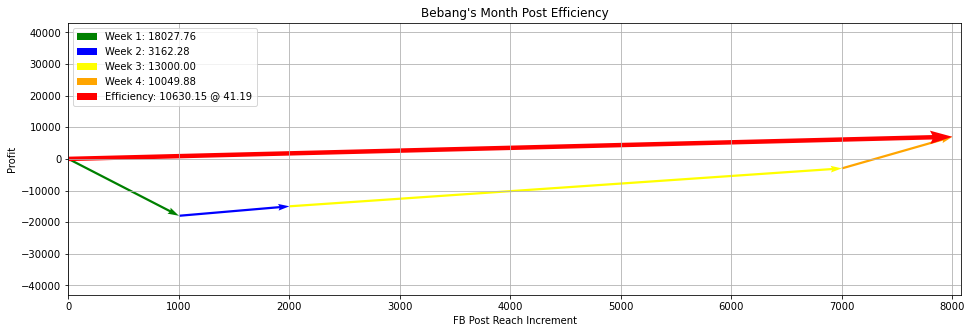

In [20]:
## START OF FUNCTION
def month_profit_trace(profit, reach, make_figs=True): ## You can simplify/ optimize this code for extra points
    if (profit.shape == (4,)) and (reach.shape == (4,)): # It checks the number of profit and shape are four
        week1 = np.array((reach[0], profit[0])) # It creates a new set of array for the week with profit and         
        week2 = np.array((reach[1], profit[1]))
        week3 = np.array((reach[2], profit[2]))
        week4 =np.array((reach[3], profit[3]))
        
        week_total = week1 + week2 + week3 + week4     
        week_performance = np.linalg.norm(week_total)
        alpha = 10**-6
        reach_gradient =  np.arctan((week_total[1])/(week_total[0] + alpha))
        reach_gradient = np.degrees(reach_gradient)
        

        plt.figure(figsize=(16,5))
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim(0,1.01*np.sum(reach))
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()
        
        plt.quiver(0,0, week1[0], week1[1],
                   angles='xy', scale_units='xy',scale=1, color='green', width=0.0025,
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
           
        plt.quiver( week1[0], week1[1], week2[0],week2[1],
                   angles='xy', scale_units='xy',scale=1, color='blue', width=0.0025,
                   label='Week 2: {:.2f}'.format(np.linalg.norm(week2)))
        
        plt.quiver(( week1[0]+ week2[0]), (week1[1]+ week2[1]), week3[0],week3[1],
                   angles='xy', scale_units='xy',scale=1, color='yellow', width=0.0025,
                   label='Week 3: {:.2f}'.format(np.linalg.norm(week3)))
        plt.quiver(( week1[0]+ week2[0]+ week3[0]), (week1[1]+ week2[1]+week3[1]), week4[0],week4[1],
                   angles='xy', scale_units='xy',scale=1, color='orange', width=0.0025,
                   label='Week 4: {:.2f}'.format(np.linalg.norm(week4)))
        ## put necessary vector plotting code here

        plt.quiver(0,0, week_total[0], week_total[1], 
                  angles='xy', scale_units='xy',scale=1, color='red', width=0.005,
                  label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))

        plt.legend(loc='upper left')

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)

        plt.show()
    
    else:
        print('Dimension error') ## Make a more appropriate error statement. 

## END OF FUNCTION  

profit= np.array([-18000, 3000, 12000, 10000])    ## You can change the values to make different scenarios
reach = np.array([1000, 1000, 5000, 1000])             ## You can change the values to make different scenarios

month_profit_trace(profit, reach, make_figs=False) ## Toggle 'make_figs' during debugging or making documentations

## Guide questions:
    
    1. What is the relationship between the FB post reach and the profit? 
        The relationship between the FB post reach and the profit it is directly proportional to the efficiency.

    2.Why is profit in the y-axis and FB post reach on the x-axis and not the other way around?
           The reason why the profit is on the y-axis and the FB post is on the x-axis is because if the x- axis and y-axis changed the values of the profit would be negative. This would come up as a loss of the profit. On the other hand, the FB post would be on the y- axis therefore if you read the graph it wouldn't make sense and it is hard to understand the graph.

    3.Kindly explain the process of plotting the post efficiency vectors.
        The first thing that I've been used is the quiver function which is the same from the cell 1 but this cell has five arrows. The parameter that has been use is also the same for the cell 1 where X and Y as the profit and Fb post Reach to represent the weeks. The cell 1 and cell 3 has the same process but different on the representation.

    4.Provide a necessary equations that are representative to finding the  performanceweek  and  reachgradient .

    5.Try to alter the 'reach' and 'profit' values to display different scenarios. Save at least 3 scenarios then append and discuss the figures in your report.

    6.What can be observed and concluded with the behavior of the vectors with respect to post efficiency?
      The behavior of the vector with respect to the post efficiency is that the profit and reach are directly proportional because if I decrease the values of the two the post effieciency will decrease and same also if I increase the value.